# Beginning Set-up

In [ ]:
import pandas as pd

folder_path = '../Final Data/final_data.csv'

real_df = pd.read_csv(folder_path)

# Delete before submission, for sample data set only

In [ ]:
df = real_df.head(100)

df.to_csv('../Final Data/subset_final_data.csv', index=False)

In [ ]:
# from plotnine import ggplot, aes, geom_point, labs

In [ ]:
# Print unique values in the 'Airline Company' column
# Remove unwanted parts from the 'Airline Company' column
df['Airline Company'] = df['Airline Company'].str.replace("'name': '", '').str.replace("'", '')

# Print unique values in the cleaned 'Airline Company' column
print(df['Airline Company'].unique())

In [ ]:
# only need to run once 
df['delay in mins'] = pd.to_numeric(df['delay in mins'].str.replace("'delay':", ''), errors='coerce')

df['departure airport IATA'] = df['departure airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['arrival airport IATA'] = df['arrival airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'].str.replace("'delay':", ''), errors='coerce')


# Exhibit 1 - Does departure delay necessarily mean an arrival delay? 
## Note to self (kylin): create one for different arrival airports and departure airports, by modifying the code
- different for different airlines 
- their ability to catch-up is different

Index(['departure airport IATA', 'arrival airport IATA', 'delay in mins',
       'estimatedDelay', 'Airline Company', 'month_day'],
      dtype='object')


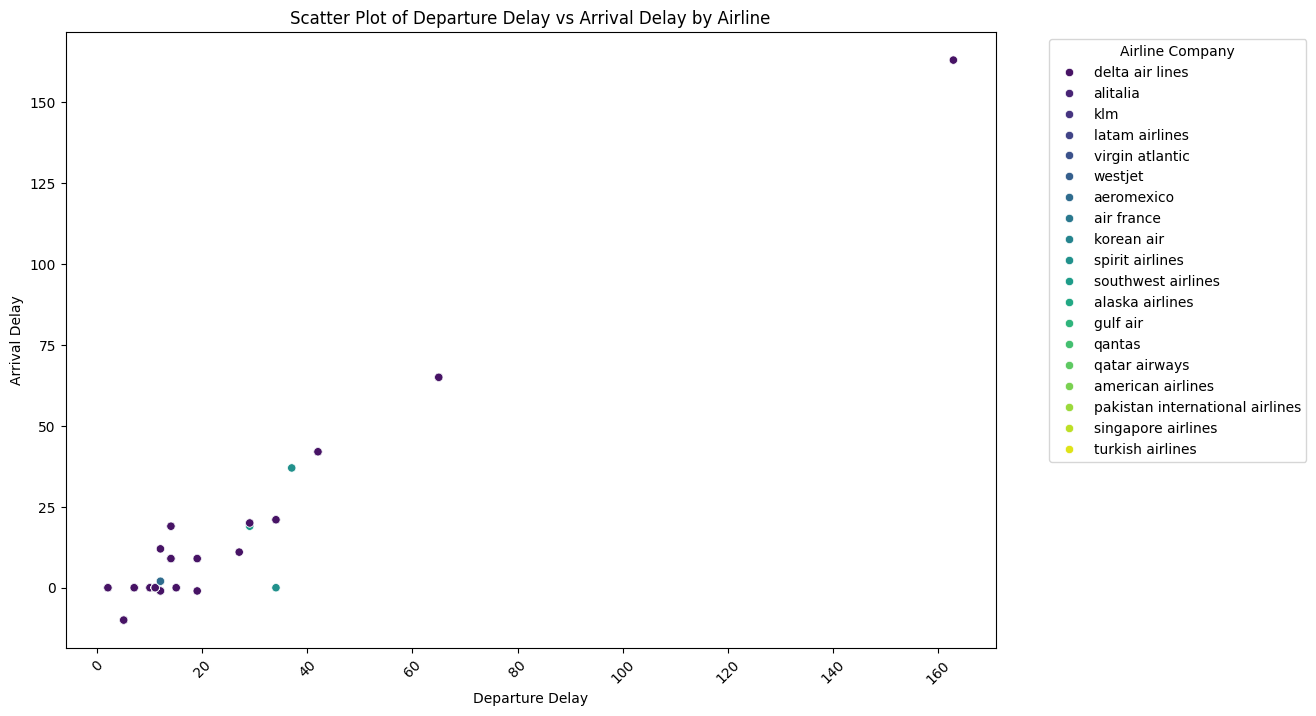

In [110]:
# good, colorful and good dots, don't touch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# Print the column names to identify the correct ones
print(df.columns)

# Adjust the column names based on your actual dataset
x_column = 'delay in mins'  # Replace with the correct column name
y_column = 'estimatedDelay'  # Replace with the correct column name

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set plot labels and title
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay by Airline')

# Show legend
plt.legend(title='Airline Company', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


Index(['departure airport IATA', 'arrival airport IATA', 'delay in mins',
       'estimatedDelay', 'Airline Company', 'month_day'],
      dtype='object')


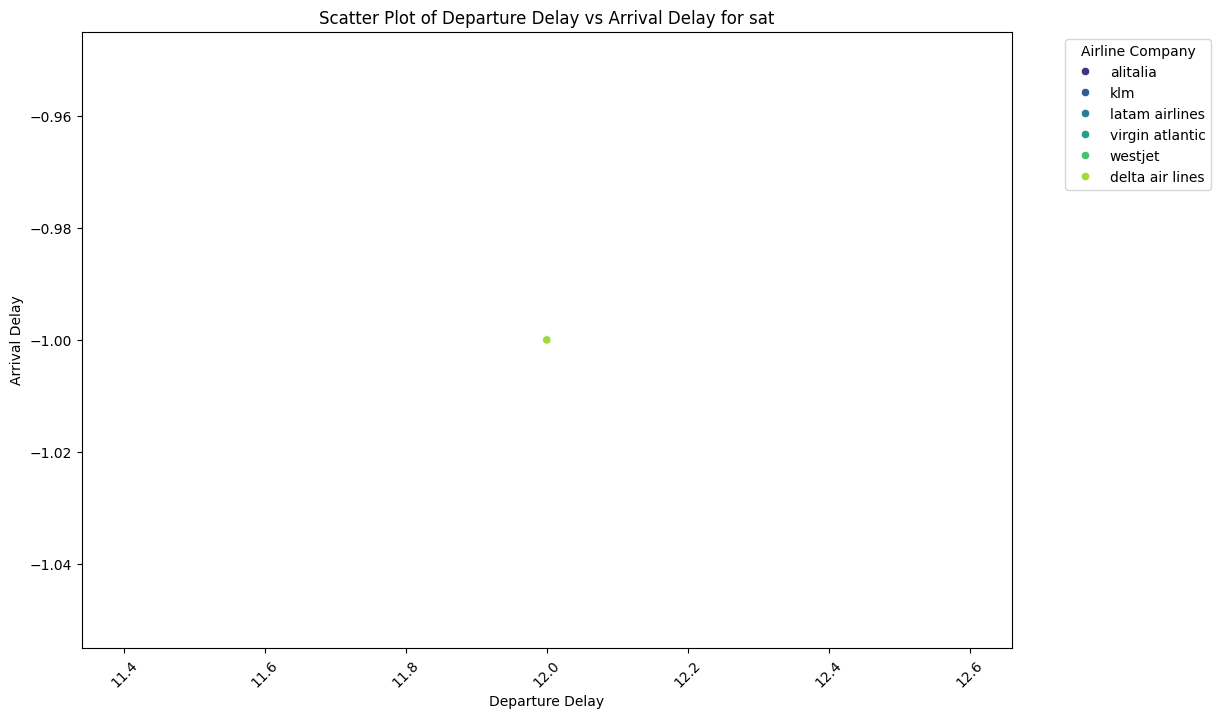

In [111]:
# good, second graph, don't touch - data issue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# Get user input for the arrival airport
arrival_airport_input = input("Enter arrival airport (e.g., LAX): ")

# Filter the dataframe based on user input
filtered_df = df[df['arrival airport IATA'] == arrival_airport_input]

# Print the column names to identify the correct ones
print(filtered_df.columns)

# Adjust the column names based on your actual dataset
x_column = 'delay in mins'  # Replace with the correct column name
y_column = 'estimatedDelay'  # Replace with the correct column name

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=filtered_df, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set plot labels and title
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title(f'Scatter Plot of Departure Delay vs Arrival Delay for {arrival_airport_input}')

# Show legend
plt.legend(title='Airline Company', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Exhibit 2 - How does departure delay compares to arrival delay for your flight? 
* should have all parameters 
* find a few options to demonstrate 

In [113]:
# need to change label content - a dot with a label, with hover- over, with regression line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, airline, and destination airport
departure_airport = input("Enter departure airport (e.g., ATL): ").lower()
airline = input("Enter airline (e.g., Delta Air Lines): ").lower()
destination_airport = input("Enter destination airport (e.g., RSW): ").lower()

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['Airline Company'] == airline) &
                 (df['arrival airport IATA'] == destination_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    fig_delay = px.scatter(filtered_df, x='delay in mins', y='estimatedDelay', title=f'place holder title {airline.upper()} Airline to {destination_airport.upper()}',
                 labels={'delay in mins': 'departure delay', 'estimatedDelay': 'arrival delay'},
                 hover_name='arrival airport IATA',
                 hover_data={'arrival airport IATA': False, 'delay in mins': True, 'estimatedDelay': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )
fig_delay.show()


In [ ]:
# worked - sorted, consolidated, and has input command
import pandas as pd

# Assuming the column names in your dataset are 'departure airport IATA', 'arrival airport IATA', 'delay in mins', 'estimatedDelay', 'Airline Company'

# Convert 'estimatedDelay' to numeric (if it's not already)
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Get user input for the departure airport IATA code
user_departure_airport = input("Enter the departure airport IATA code: ").strip()

# Filter for flights departing from the specified airport
df_user_departure = df[df['departure airport IATA'].str.contains(user_departure_airport, na=False)]
# Extract the actual airport code from the strings in the 'arrival airport IATA' column
# average_delay_df['arrival airport IATA'] = average_delay_df['arrival airport IATA'].str.extract(r"'iataCode': '(.*?)'")

# Create a DataFrame with average estimatedDelay for each arrival airport
average_delay_df = df_user_departure.groupby('arrival airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)

# good final - gives iata, estimated delay, long, lat
# Merge the DataFrames on the common column 'arrival airport IATA' and 'code'
merged_df = average_delay_df.merge(airports_df, left_on='arrival airport IATA', right_on='code', how='left')

# Drop the redundant columns
merged_df = merged_df[['arrival airport IATA', 'estimatedDelay', 'longitude', 'latitude']]

# Print the resulting DataFrame
print(merged_df)

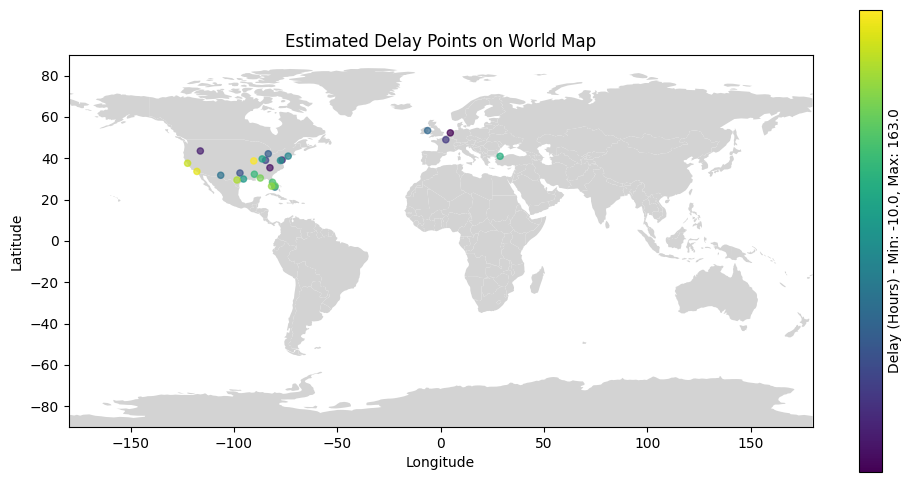

In [109]:
# good graph, good legend, don't touch
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Assuming you have the 'worldmap' and 'merged_df' DataFrames

# Merge the world map with the merged_df based on latitude and longitude
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Determine the color range and normalization
vmin = merged_df['estimatedDelay'].min()
vmax = merged_df['estimatedDelay'].max()

# Create a diverging colormap
cmap = 'viridis'

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
scatter = globe_df.plot(ax=ax, markersize=20, alpha=0.7, c=merged_df['estimatedDelay'], cmap=cmap, vmin=vmin, vmax=vmax)

# Add a colorbar
cbar = plt.colorbar(scatter.get_children()[0], ax=ax, orientation='vertical', label=f'Delay (Hours) - Min: {vmin}, Max: {vmax}', ticks=[vmin, vmax])

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


# Exhibit 3 - does Ryanair delay more than other airlines? 

does RyanAir suck more than the other airlines? Use bar chart to show how much ryanair delay is compared to other airlines flying out of the same airport and flying to the same airport

1. filter the data set by depart/ arrival airport 
2. compile data from the different airlines (so there is one representative name for each airline)
3. show the average (arrival and departure) delay in a bar chart 


crazy idea: exhibit x - can you make it? 
1. user input departure / arrival airport / airline 
2. get the *mean* departure delay for route and *standard deviation* of the flights 
3. assume that the flight delays happens on a normal distribution
4. get the probability that you will still make it if you are running 5 / 10 / 15 minutes late



In [ ]:
# Worked, don't touch, but I think the data might have some problems
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport and arrival airport
departure_airport = input("Enter departure airport (e.g., ATL): ")
arrival_airport = input("Enter arrival airport (e.g., RSW): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['arrival airport IATA'] == arrival_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Calculate the average delay for each airline
    average_delay_by_airline = filtered_df.groupby('Airline Company')['estimatedDelay'].mean()

    # Plot the bar chart
    plt.figure(figsize=(12, 8))
    average_delay_by_airline.sort_values().plot(kind='barh', color='skyblue')
    
    # Set plot labels and title
    plt.xlabel('Airline Company')
    plt.ylabel('Average Delay (Minutes)')
    plt.title(f'Average Delay for each Airline from {departure_airport} to {arrival_airport}')

    # Display the plot
    plt.show()


# Exhibit 4 - most delayed airport in the world
1. filter data by summarizing the departure airport average delay time 

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, arrival airport, and airline
departure_airport = input("Enter departure airport (e.g., ATL): ")
arrival_airport = input("Enter arrival airport (e.g., RSW): ")
airline = input("Enter airline (e.g., Delta Air Lines): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['arrival airport IATA'] == arrival_airport) &
                 (df['Airline Company'] == airline)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Check if 'delay in mins' column contains valid numeric values
    if filtered_df['delay in mins'].notnull().all() and filtered_df['delay in mins'].astype(str).str.isnumeric().all():
        # Calculate mean departure delay and standard deviation
        mean_delay = filtered_df['delay in mins'].mean()
        std_dev = filtered_df['delay in mins'].std()

        # Print the mean delay and standard deviation
        print(f"Mean Departure Delay: {mean_delay} minutes")
        print(f"Standard Deviation: {std_dev} minutes")

        # Probability calculations only if standard deviation is non-zero
        if std_dev != 0:
            # Calculate probabilities
            probabilities = [stats.norm.cdf(-5, loc=mean_delay, scale=std_dev),
                             stats.norm.cdf(-10, loc=mean_delay, scale=std_dev),
                             stats.norm.cdf(-15, loc=mean_delay, scale=std_dev)]

            # Print probabilities
            print(f"Probability of being late by 5 minutes: {probabilities[0]:.4f}")
            print(f"Probability of being late by 10 minutes: {probabilities[1]:.4f}")
            print(f"Probability of being late by 15 minutes: {probabilities[2]:.4f}")

            # Create a standard normal distribution plot
            plt.figure(figsize=(12, 8))
            sns.histplot(filtered_df['delay in mins'], kde=True, stat='density', color='skyblue')
            plt.title('Standard Normal Distribution of Departure Delay')
            plt.xlabel('Departure Delay (minutes)')
            plt.ylabel('Density')

            # Plot vertical lines for mean and 1 standard deviation
            plt.axvline(mean_delay, color='red', linestyle='dashed', linewidth=2, label='Mean')
            plt.axvline(mean_delay + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean + 1 Std Dev')
            plt.axvline(mean_delay - std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean - 1 Std Dev')

            # Show legend
            plt.legend()

            # Display the plot
            plt.show()
        else:
            print("Cannot calculate probabilities. Standard deviation is zero.")
    else:
        print("Invalid values in the 'delay in mins' column.")


Invalid values in the 'delay in mins' column.


Mean Departure Delay: 12.0 minutes
Standard Deviation: nan minutes
Probability of being late by 5 minutes: nan
Probability of being late by 10 minutes: nan
Probability of being late by 15 minutes: nan


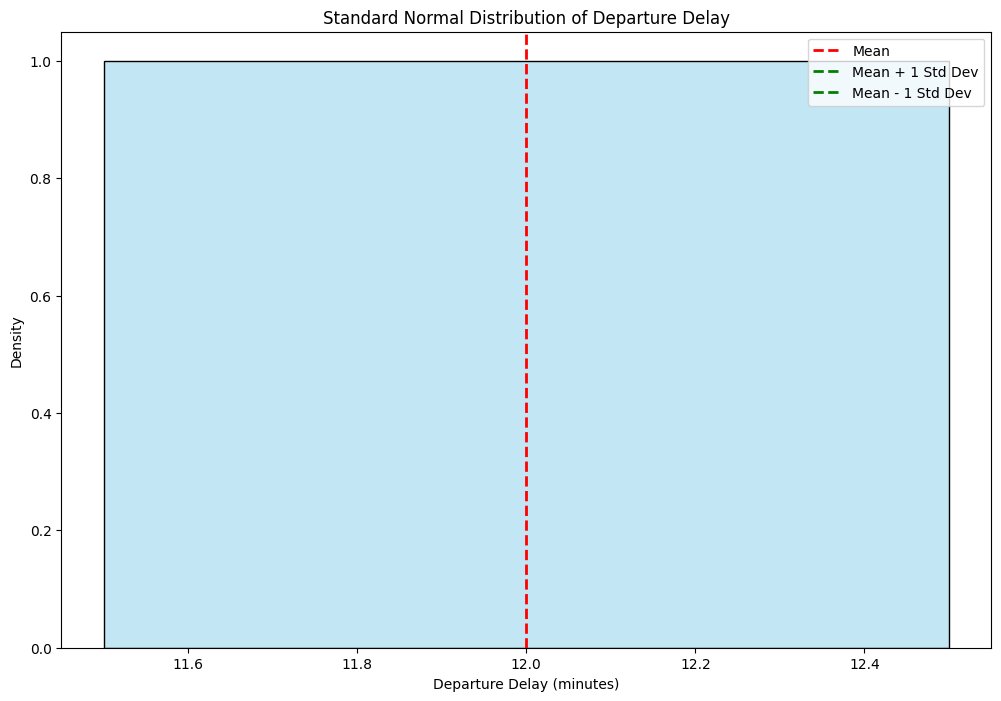

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, arrival airport, and airline
departure_airport = input("Enter departure airport (e.g., ATL): ")
arrival_airport = input("Enter arrival airport (e.g., RSW): ")
airline = input("Enter airline (e.g., Delta Air Lines): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['arrival airport IATA'] == arrival_airport) &
                 (df['Airline Company'] == airline)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Calculate mean departure delay and standard deviation
    mean_delay = filtered_df['delay in mins'].mean()
    std_dev = filtered_df['delay in mins'].std()

    # Print the mean delay and standard deviation
    print(f"Mean Departure Delay: {mean_delay} minutes")
    print(f"Standard Deviation: {std_dev} minutes")

    # Probability calculations for being late by 5, 10, and 15 minutes
    probabilities = [stats.norm.cdf(-5, loc=mean_delay, scale=std_dev),
                     stats.norm.cdf(-10, loc=mean_delay, scale=std_dev),
                     stats.norm.cdf(-15, loc=mean_delay, scale=std_dev)]

    # Print probabilities
    print(f"Probability of being late by 5 minutes: {probabilities[0]:.4f}")
    print(f"Probability of being late by 10 minutes: {probabilities[1]:.4f}")
    print(f"Probability of being late by 15 minutes: {probabilities[2]:.4f}")

    # Create a standard normal distribution plot
    plt.figure(figsize=(12, 8))
    sns.histplot(filtered_df['delay in mins'], kde=True, stat='density', color='skyblue')
    plt.title('Standard Normal Distribution of Departure Delay')
    plt.xlabel('Departure Delay (minutes)')
    plt.ylabel('Density')

    # Plot vertical lines for mean and 1 standard deviation
    plt.axvline(mean_delay, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(mean_delay + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean + 1 Std Dev')
    plt.axvline(mean_delay - std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean - 1 Std Dev')

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()
